# 机器学习实验一：KNN实现对semeion数据集的手写数字识别
- 姓名：刘伟
- 学号：2013029
- 专业：物联网工程

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

### 导入需要的包

In [1]:
# 导入实验所需要的包
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

### 导入数据集

In [2]:
# 导入semesion数据集
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
X,Y = Img2Mat('D:\\NKU\\Semester_3\\机器学习\\semeion.data')
np.shape(X), np.shape(Y)

C:\Users\Kyrie\AppData\Local\Temp\ipykernel_22616\1427504029.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

### 基本要求
编程实现KNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度

### 要求采用留一法

In [4]:
# 手动实现KNN算法，要求采取留一法

def MyKnnClassifier(data_X, data_y, neighbors):
    
    # 留一法 则所有数据都会被测试
    # 生成训练数据集和测试数据集
    
    loo = LeaveOneOut()  # 利用LeaveOneOut()函数实现每次留一法的数据分割，每次仅挑出一个作为测试数据集
    all_len = data_X.shape[0] # 全部总共的数据集大小
    testRes = []  # 存放测试结果
    acc = 0   # 计算准确率
    
    # 留一法对所有数据进行测试
    # 每次测试时，其余所有数据作为训练数据集
    # 针对测试集中每一个样本进行预测
    for train, test in loo.split(X): # loo.split(X) 每次仅会分割出 一个 作为test数据集
        
        X_train, X_test, Y_train, Y_test = X[train],X[test],Y[train],Y[test]
        trainShape = X_train.shape[0]   # 获得训练集的大小
        testShape = X_test.shape[0]     # 获得测试集的大小 恒为 1
        
        # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
        testDiffMat = np.tile(X_test[0],(trainShape , 1)) - X_train
        sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
        
        # 方差距离为方差矩阵的整行求和，是一个一位列向量
        sqTestDiffDis = sqTestDiffMat.sum(axis=1)
        testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
        sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
        
        labelCount = []  # 存放预测中排名靠前的 预测neighbors索引
        
        for j in range(neighbors):  # 考察k近邻属于哪些类
            labelCount.append(Y_train[sortIndex[j]][0])
            
        # 把k近邻中最多的那个标签作为分类结果    
        classifyRes = Counter(labelCount)    
        classifyRes = classifyRes.most_common(2)[0][0]
        testRes.append(classifyRes)
        
        # 分类正确则将accRate+1
        if classifyRes == Y_test[0]:  
            acc += 1
    
    # 计算总的准确率
    accRate = acc / all_len
    
    # 输出打印结果     
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors,data_X.shape[0],acc,accRate))
    
    return accRate

In [5]:
MyKnnClassifier(X, Y, 1)
MyKnnClassifier(X, Y, 3)
MyKnnClassifier(X, Y, 5)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

### 中级要求
与weka机器学习包中的kNN分类结果进行对比

 **实验结果源于 weka 应用的测试结果：**  
 **利用 weka 测试了 K = {1, 3, 5, 7} 四种情况下的准确率**   
> |                                  |      K = 1     |      K = 3      |       K = 5      |      K = 7      |
|:--------------------------------:|:--------------:|:---------------:|:----------------:|:---------------:|
|  Correctly Classified Instances  | 1460   91.651% | 1437   90.2072% | 1445   90.7094 % | 1453   91.2116% |
| Incorrectly Classified Instances |  133   8.349%  |  156   9.7928%  |   148   9.2906%  |  140   8.7884%  |
|        Mean absolute error       |     0.0173     |      0.0234     |      0.0278      |      0.0315     |
|      Root mean squared error     |     0.1255     |      0.1151     |      0.1157      |      0.1168     |
|     Total Number of Instances    |      1593      |       1593      |       1593       |       1593      |

### 高级要求
将实验过程结果等图示展出

In [6]:
scores = []  #  记录所有K对应下的准确度，便于画图展示

for k in range(1,30):
    score = MyKnnClassifier(X, Y, k)
    scores.append(score)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=2时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=4时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356
k=6时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=7时，测试个数为1593  正确个数为：1469  准确率为：0.9221594475831764
k=8时，测试个数为1593  正确个数为：1472  准确率为：0.9240426867545511
k=9时，测试个数为1593  正确个数为：1471  准确率为：0.9234149403640929
k=10时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=11时，测试个数为1593  正确个数为：1456  准确率为：0.9139987445072191
k=12时，测试个数为1593  正确个数为：1460  准确率为：0.9165097300690521
k=13时，测试个数为1593  正确个数为：1461  准确率为：0.9171374764595104
k=14时，测试个数为1593  正确个数为：1453  准确率为：0.9121155053358443
k=15时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=16时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=17时，测试个数为1593  正确个数为：1442  准确率为：0.9052102950408035
k=18时，测试个数为1593  正确个数为：1438  准确率为：0.9026993094789705
k=19时，测试个数为1593  正确个数为：1436  准确率为：0.901443816698054
k=2

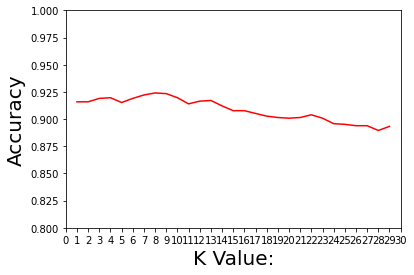

In [7]:
plt.xlabel('K Value:',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)

# 设置 X轴 间隔
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 30)
plt.ylim(0.80, 1)

# 留一法 KNN K取不同值的分类结果
plt.plot(range(1,30),scores,'r')
plt.show()